## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'LogReturn',
       'RSI2', 'MA10', 'MA30', 'MA200', 'EMA10', 'EMA30', 'EMA200', 'ROC10',
       'ROC30', 'MOM10', 'MOM30', '%K10', '%D10', '%K30', '%D30', 'VIX',
       'RiskFreeRate', 'Volume', 'delta', 'gamma', 'theta', 'vega', 'rho'],
      dtype='object')
(3242, 30)
(433, 30)
(3242, 8)
(433, 8)
(3242, 10)
(433, 10)


<string>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
<string>:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


## Loading Existing Models

Episode 0/1000, Total Reward: 41.64040034037883, P&L: -578.9333343505859, Std Dev P&L: nan
Episode 100/1000, Total Reward: 2.5941575664827354, P&L: 68.6701774597168, Std Dev P&L: 682.891666791838
Episode 200/1000, Total Reward: -19.155247175738307, P&L: 331.18457794189453, Std Dev P&L: 596.2816240100491
Episode 300/1000, Total Reward: -8.06645153306461, P&L: 928.1593322753906, Std Dev P&L: 458.2770038936186
Episode 400/1000, Total Reward: -0.4564874441122596, P&L: -46.71783447265625, Std Dev P&L: 615.1654775310442
Episode 500/1000, Total Reward: 0.41205944040997655, P&L: -135.13107299804688, Std Dev P&L: 926.5245323196751
Episode 600/1000, Total Reward: 0.050559342110829075, P&L: -187.85991668701172, Std Dev P&L: 562.5478969249399
Episode 700/1000, Total Reward: -0.050571759663054584, P&L: 117.02079772949219, Std Dev P&L: 828.5009116159514
Episode 800/1000, Total Reward: 0.034128102489804815, P&L: 57.74574279785156, Std Dev P&L: 945.0844152941808
Episode 900/1000, Total Reward: -0.0034

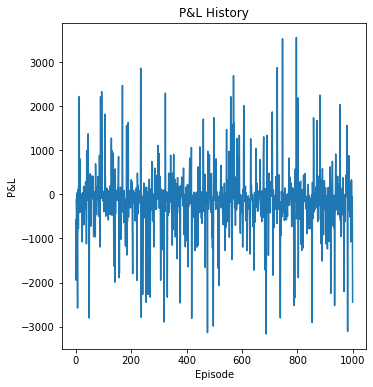

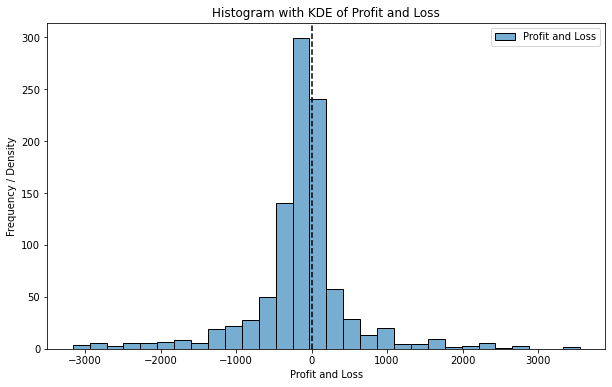

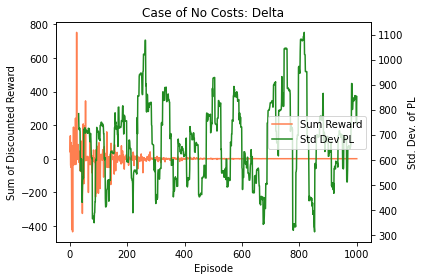

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

Episode 0/1000, Total Reward: -76.26985642189798, P&L: -337.1631622314453, Std Dev P&L: nan


<string>:87: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)


Episode 100/1000, Total Reward: -30.822158090329474, P&L: 290.67745208740234, Std Dev P&L: 573.2631783366078
Episode 200/1000, Total Reward: -2.6168186236332227, P&L: 486.578369140625, Std Dev P&L: 599.4142971907231
Episode 300/1000, Total Reward: 6.9288514040564815, P&L: -3.91387939453125, Std Dev P&L: 486.90977625130535
Episode 400/1000, Total Reward: -0.24247675828007734, P&L: 172.94960021972656, Std Dev P&L: 643.564554609826
Episode 500/1000, Total Reward: 0.003601640967068609, P&L: -337.4279022216797, Std Dev P&L: 251.07087776656283
Episode 600/1000, Total Reward: 0.34966865115514634, P&L: 15.891265869140625, Std Dev P&L: 933.6807415214129
Episode 700/1000, Total Reward: -0.020066870248646534, P&L: -53.846073150634766, Std Dev P&L: 905.2409392676332
Episode 800/1000, Total Reward: -0.1279327986667277, P&L: -1283.8363647460938, Std Dev P&L: 586.1449343566445
Episode 900/1000, Total Reward: 0.014905690030875218, P&L: 70.05558013916016, Std Dev P&L: 948.4711546376908


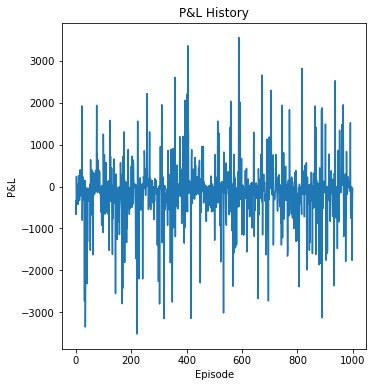

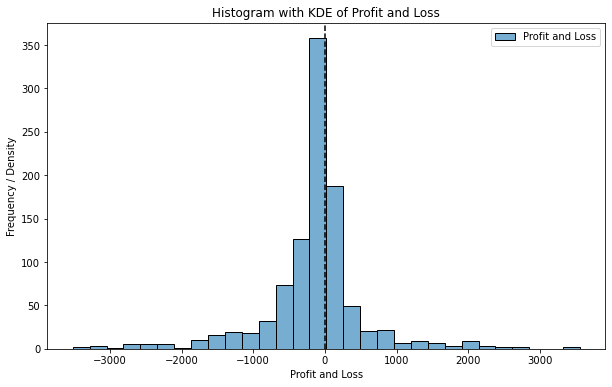

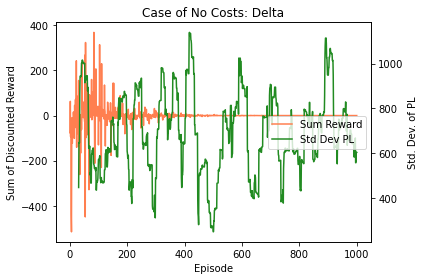

In [4]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


Episode 0/1000, Total Reward: -83.47842566463825, P&L: 37.15400695800781, Std Dev P&L: nan
Episode 100/1000, Total Reward: -31.992633446967847, P&L: -69.2779541015625, Std Dev P&L: 610.4022344525565
Episode 200/1000, Total Reward: -7.8259408893701154, P&L: 302.46829986572266, Std Dev P&L: 654.5134809854198
Episode 300/1000, Total Reward: -56.73082176178017, P&L: 1488.2827758789062, Std Dev P&L: 703.828056665958
Episode 400/1000, Total Reward: -0.7512676335484683, P&L: -452.02178955078125, Std Dev P&L: 784.6923553472079
Episode 500/1000, Total Reward: -0.5648834119644268, P&L: 258.7604522705078, Std Dev P&L: 767.605694493409
Episode 600/1000, Total Reward: -0.8365192118303737, P&L: -933.9004516601562, Std Dev P&L: 420.0771056983742
Episode 700/1000, Total Reward: 0.02230033167380227, P&L: -921.4405059814453, Std Dev P&L: 884.5743846528461
Episode 800/1000, Total Reward: -0.07030095043046114, P&L: -1283.1321716308594, Std Dev P&L: 721.3918503550688
Episode 900/1000, Total Reward: -0.0947

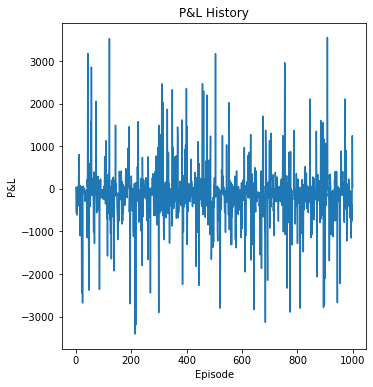

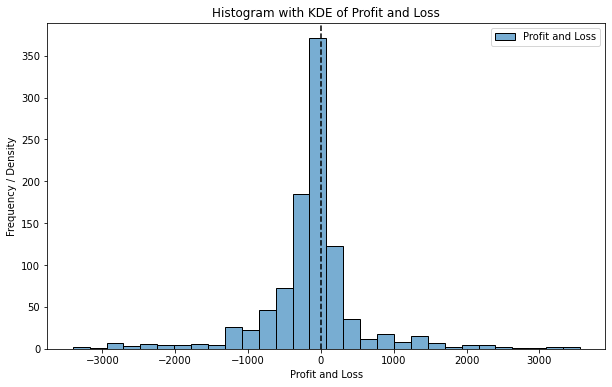

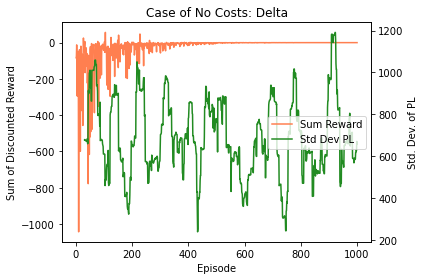

In [5]:
import DDPG

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    reward_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        reward_history.append(total_reward)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, reward_history, std_pl_history


In [7]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


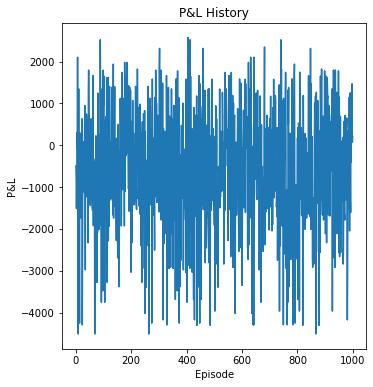

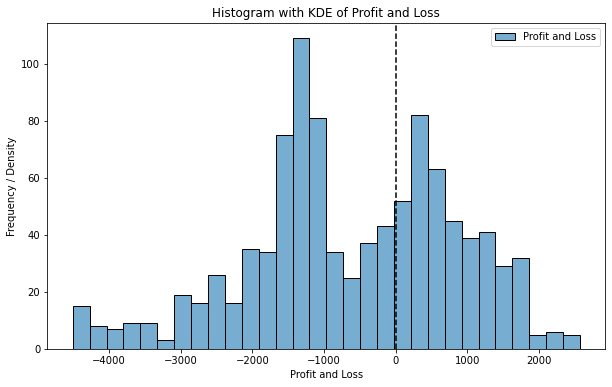

In [8]:
# Test the agent
pl_history_delta, reward_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


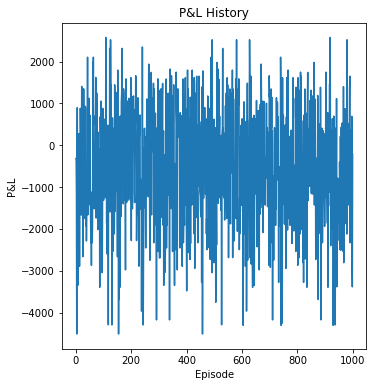

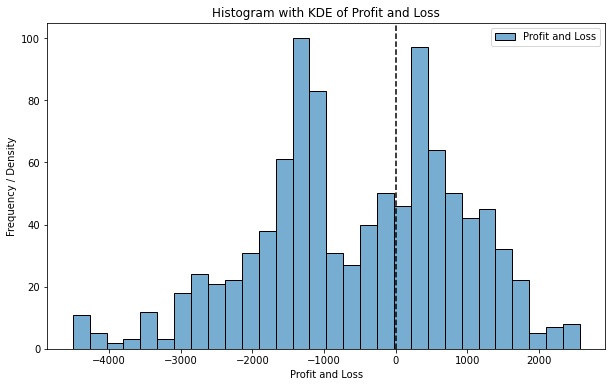

In [9]:
# Test the agent
pl_history_dqn, reward_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


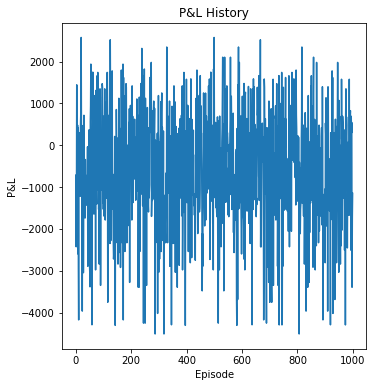

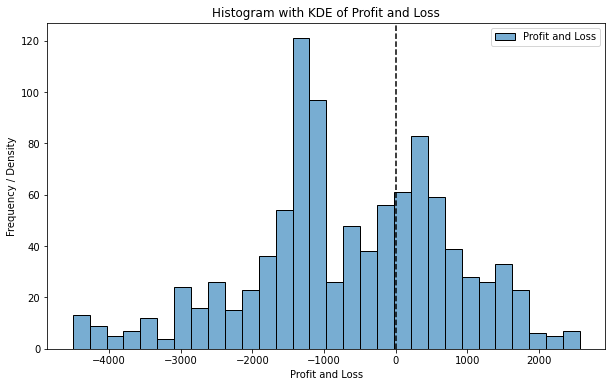

In [10]:
# Test the agent
pl_history_ddpg, reward_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

## Combining

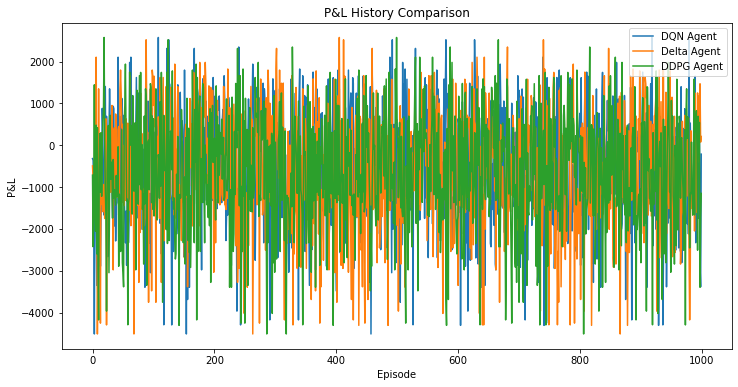

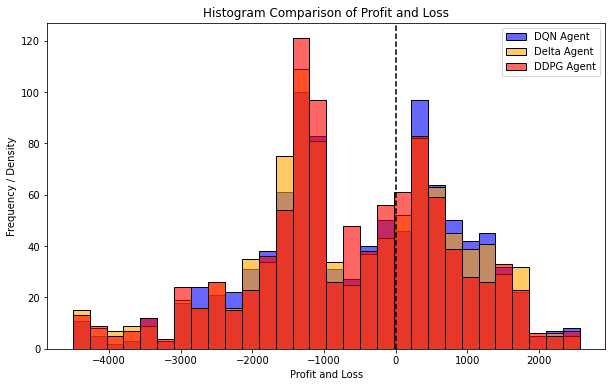

In [11]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

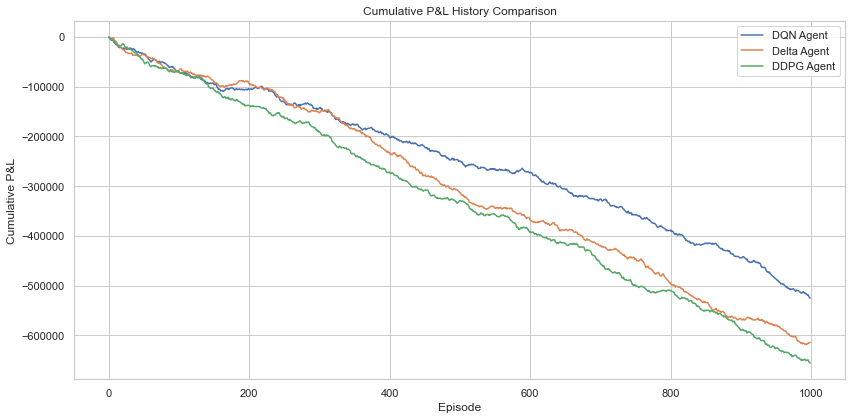

In [12]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
print(reward_history_ddpg)
print(reward_history_delta)
print(reward_history_dqn)

[-1343.0594090652849, -323.88053399939844, -55.44925360091991, -679.8156345316737, -130.5359865127289, -1668.5975048279704, -298.9415564756543, -493.4072392765068, -1591.077444740464, -1287.7165558546722, -575.4602331798726, -41.945565880921976, -1056.6340532809525, -545.7536162703625, -1475.3117809666144, -1235.7592443548413, -477.78339929283095, -600.7477515350372, -530.6002655091321, -803.3221289227854, -660.1078377740566, -1318.8477958672804, -477.42139091839937, -659.542340100485, -1120.5535325318028, -2138.645210801348, -1284.5378006404483, -1781.8623431875972, -1163.3470943640875, -1154.7492816368124, -1814.1259544853992, -1480.3434144935527, -1319.2182967048484, -1170.1482778077686, -1061.1793938844446, -688.7810889433134, -1621.7835984006351, -939.5054357226533, -854.6123100184724, -803.0895633362912, -1064.6157789626907, -330.3809100697344, -1233.5606503521337, -1007.8060506588619, -326.6549768462397, -251.59829677731614, -1520.4420297256488, -489.87213837461024, -1068.553788

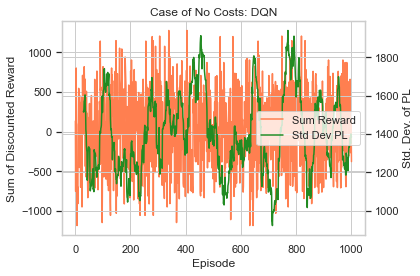

In [14]:
## DELTA
episodes = np.array(list(range(1, len(reward_history_delta) + 1)))

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_delta, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

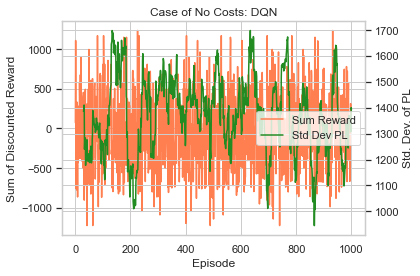

In [15]:
## DQN

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_dqn, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

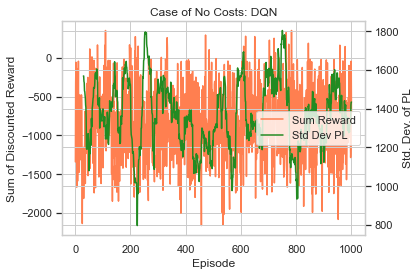

In [16]:
## DDPG

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_ddpg, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()